<a href="https://colab.research.google.com/github/huyhoang1996vn/my-ml/blob/master/K_nearest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn

https://www.w3schools.com/python/python_ml_knn.asp

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

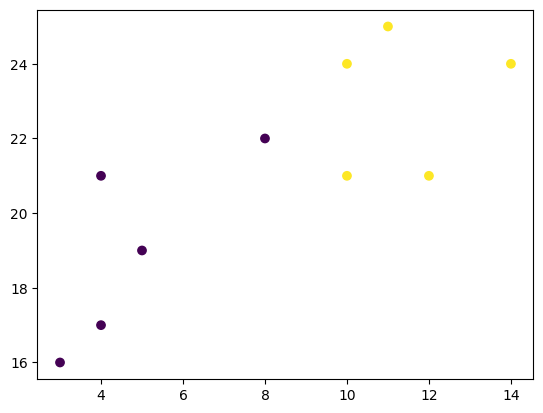

In [3]:
import matplotlib.pyplot as plt

x = [4, 5, 10, 4, 3, 11, 14 , 8, 10, 12]
y = [21, 19, 24, 17, 16, 25, 24, 22, 21, 21]
classes = [0, 0, 1, 0, 0, 1, 1, 0, 1, 1]

plt.scatter(x, y, c=classes)
plt.show()

In [5]:
features = list(zip(x, y))
target = classes
features

[(4, 21),
 (5, 19),
 (10, 24),
 (4, 17),
 (3, 16),
 (11, 25),
 (14, 24),
 (8, 22),
 (10, 21),
 (12, 21)]

In [6]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(features, target)

KNeighborsClassifier(n_neighbors=3)

The `n_neighbors` parameter in `KNeighborsClassifier` specifies the number of nearest data points the model considers when making a classification decision.

In the code `knn = KNeighborsClassifier(n_neighbors=3)`, you are setting the number of neighbors to 3. This means that for any new data point you want to classify, the model will look at the 3 closest data points in the training set and assign the new data point the class that is most represented among those 3 neighbors. Using `n_neighbors=3` generally provides a smoother decision boundary and is less susceptible to noise in the data compared to using `n_neighbors=1`.

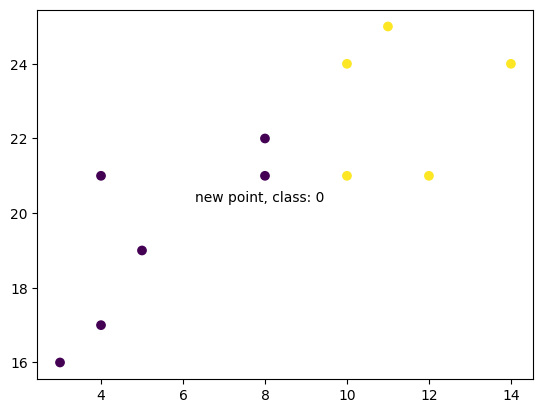

In [7]:
new_x = 8
new_y = 21
new_point = [(new_x, new_y)]

prediction = knn.predict(new_point)

plt.scatter(x + [new_x], y + [new_y], c=classes + [prediction[0]])
plt.text(x=new_x-1.7, y=new_y-0.7, s=f"new point, class: {prediction[0]}")
plt.show()

Unfortunately, there is no magic way to find the best value for k. We have to loop through many different values, then use our best judgment.


Using Cross Validation to Get the Best Value of k


In [9]:
from sklearn.model_selection import cross_val_score
k_values = [i for i in range (1,10)]
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, features, target, cv=5)
    scores.append(np.mean(score))

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:978: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_scorer.py", line 144, in __call__
    score = scorer(estimator, *args, **routed_params.get(name).score)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_scorer.py", line 472, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/neighbors/_classification.py", line 446, in score
    return super().score(X, y, sample_weight)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 572, in score
    return accuracy_score(y, self.predict(X), sample_

Text(0, 0.5, 'Accuracy Score')

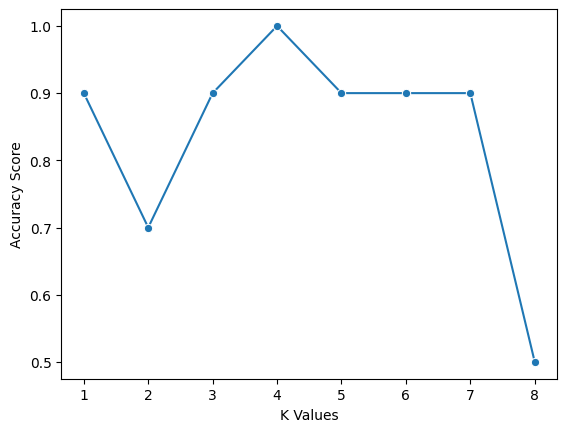

In [10]:
sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")